# GRAFICOS DATOS MEDICIONES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from functools import partial
from matplotlib.ticker import ScalarFormatter, NullFormatter

In [2]:
%load_ext autoreload
%autoreload 2
from peak_counting import utils
from peak_counting import strats
from peak_counting import constants
from peak_counting import analysis

In [3]:

peak_wls = [379, 383, 410, 413, 469, 453, 504, 522, 530, 541, 546, 550, 557, 654, 662]
ranges = {
    "UVA":(372,390),
    "B":(397, 425),
    "G":(500, 535),
    "Y":(535,570),
    "R":(630, 690),
    #"O":(555, 563),
    #"V1":(375, 381),
    #"V2":(381, 390),
}
colors = {
    "G":"green",
    "R":"red",
    "Y":"gold",
    "UVA":"rebeccapurple",
    "B":"blue",
    "O":"orange",
    "V1":"violet",
    "V2":"lightblue"
}

wl_color ={
    379:"UVA",
    410:"B",
    522:"G",
    530:"G",
    541:"Y",
    546:"Y",
    550:"Y",
    654:"R",
    662:"R",
}

beam_width_cm = 0.068976145 * 10
beam_area = np.pi * beam_width_cm**2
filter_scaling = 1/1.666666


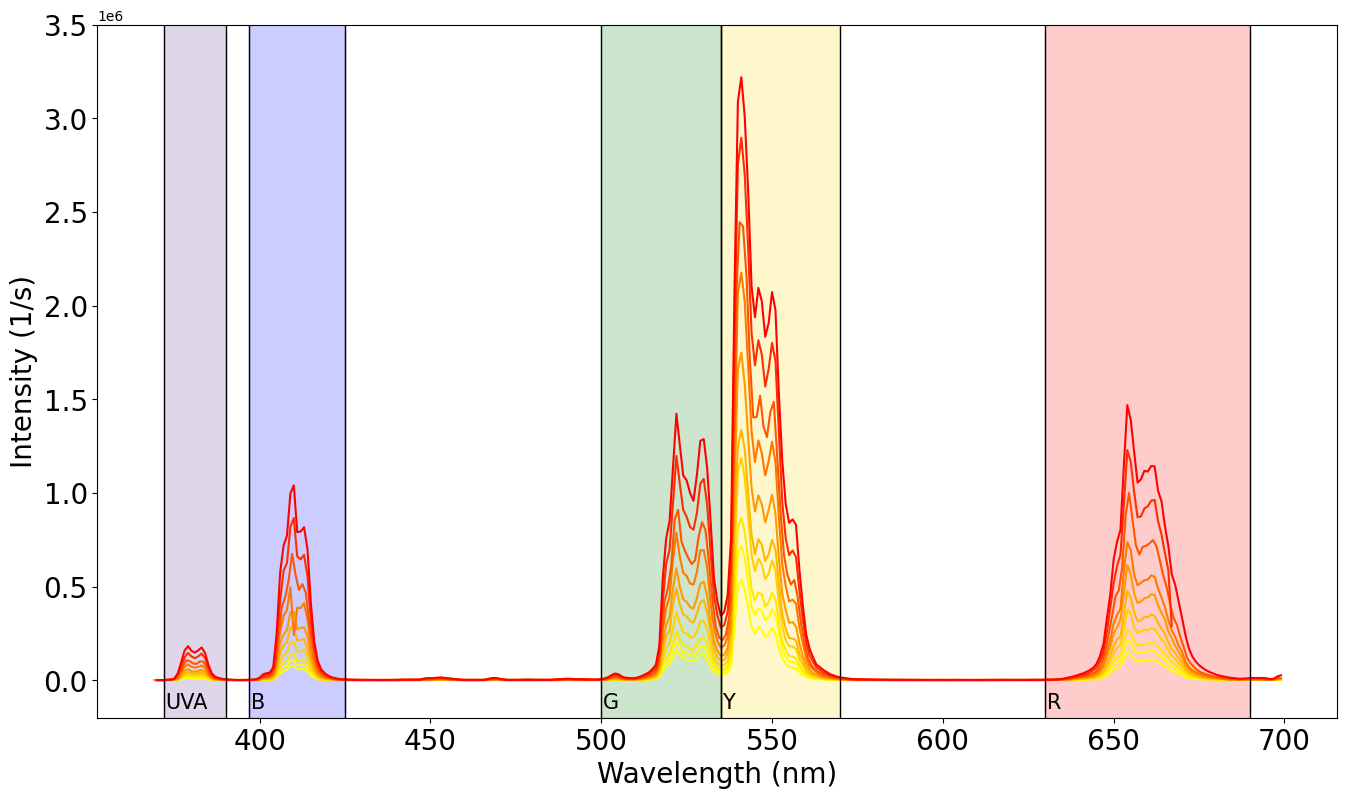

In [4]:
%matplotlib inline
from functools import partial
from matplotlib import colormaps
from matplotlib.colors import Normalize, rgb2hex

def process_spectrums():
    path = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums')
    for p in sorted(path.iterdir()):
        lst = p.name.split("_")
        curr = float(lst[0])
        if curr < 0.23 or curr > 0.35:
            continue
        print(f"reading {p.name}")
        df = pd.read_pickle(p)
        df.counts = df.counts * 10
        df.to_pickle(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_processed/{p.name}')
        if curr == 0.3069:
            df.wavelength = df.wavelength - 0.5
        plt.plot(df.wavelength, df.counts, '.-', label=curr)
    plt.legend()
    plt.show()

def load_spectrums(feed_df, spectrums_dir, feed_end=None):
    path = Path(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/{spectrums_dir}')
    for p in sorted(path.iterdir()):
        lst = p.name.split("_")
        curr = lst[0]
        df = pd.read_pickle(p)
        feed_df(df, curr)
    if feed_end is not None:
        feed_end()

def plot_spectrums(df, curr, normalization: callable = None):
    norm = Normalize(vmin=0.16, vmax=0.381)
    cmap = colormaps['autumn'].reversed()
    if normalization is not None:
        df = normalization(df)
    color = cmap(norm(float(curr)))
    plt.plot(df.wavelength, df.counts, '-', label=f"current {float(curr):.2f} A", color=color, linewidth=1.5)

def norm_by_max(df):
    df.counts = df.counts / np.max(df.counts)
    return df

def norm_by_area(df):
    df.counts = df.counts / np.sum(df.counts)
    return df

def plot_ranges(ranges: dict, colors: dict | None = None, **kwargs):
    min_height, max_height = (0.1, 0.5)
    rng_linestyle = "solid"
    rng_linewidth = 1
    texty = -0.15e6 #3.4e6
    for name, rng in ranges.items():
        if colors is not None:
            rng_color = colors[name]
        else:
            rng_color = "black"
        rng_min, rng_max = rng
        plt.axvline(rng_min, linestyle=rng_linestyle, color="black", linewidth=rng_linewidth)
        plt.axvline(rng_max, linestyle=rng_linestyle, color="black", linewidth=rng_linewidth)
        #plt.axhline(min_height, xmin=rng_min, xmax=rng_max, linestyle=rng_linestyle, color=rng_color, linewidth=rng_linewidth)
        plt.fill_betweenx([-0.2e6, 4e6], x1=rng_min, x2=rng_max, color=rng_color, alpha=0.2)
        textx = rng_min + 0.5
        plt.text(textx, texty, name, fontsize=15)
    pass


plot_max = partial(plot_spectrums, normalization=norm_by_max)
plot_area = partial(plot_spectrums, normalization=norm_by_area)
plt.figure(figsize=(16, 9), dpi=100)
load_spectrums(plot_spectrums, 'spectrums_processed')
plot_ranges(ranges, colors=colors)
plt.ylim([-0.2e6, 3.5e6])
plt.ylabel("Intensity (1/s)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
#plt.xticks([535, 570], fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yticks([])
#plt.legend(fontsize=15)
#plt.axvline(535, ymin=0, linewidth=2, color="black", linestyle="dashed")
#plt.axvline(570, ymin=0, linewidth=2, color="black", linestyle="dashed")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/spectrum.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/spectrum.png")
plt.show()
#plt.show()
#plot_spectrums(norm_by_max)
#plt.show()
#plot_spectrums(norm_by_area)
#plt.xlabel("Wavelength (nm)")
#plt.ylabel("Counts per sec (1/s)")
#plt.legend()
#plt.show()

,UVA,B,G,Y,R
power_density,,,,,
0.015973,5227.555556,21820.071429,51963.371429,147973.257143,34069.7
0.020556,7180.222222,30124.5,68447.485714,203470.514286,48989.2
0.025647,9916.111111,40187.642857,86210.914286,251347.485714,62779.466667
0.031306,13814.444444,57748.571429,119343.714286,343755.428571,86484.333333
0.037578,19476.666667,80122.857143,161731.714286,406578.857143,108863.0
0.044575,25110.555556,104302.857143,200200.0,530463.714286,142518.833333
0.052380,36428.333333,136788.928571,265748.857143,686849.142857,174034.0
0.061022,47167.222222,184450.0,317573.428571,802662.0,235045.0
0.070668,63639.444444,247917.142857,415763.142857,984287.714286,267657.0


/tmp/ipykernel_361179/180719893.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pendientes.loc[col, "m"] = np.round(m, 2)
/tmp/ipykernel_361179/180719893.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pendientes.loc[col, "c"] = np.round(c, 2)


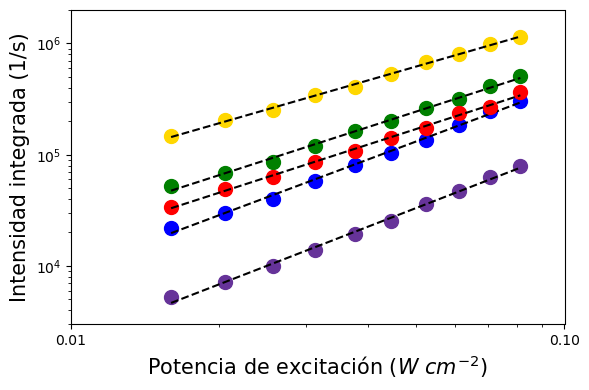

,m,c
UVA,1.72,15.56
B,1.66,16.76
G,1.43,16.70
Y,1.28,17.16
R,1.44,16.34


In [22]:

def integrate(df, rng):
    return np.sum(df.counts[df.wavelength.between(rng[0], rng[1])])/(rng[1] - rng[0]) # normalizo por el rango de wl

def load_feed(df, curr, intensities, ranges=ranges):
    for name, rng in ranges.items(): 
        intensities.loc[float(curr), name] = integrate(df, rng)
        
def plot_i_vs_ex(spectrums_dir="spectrums_processed"):
    intensities = pd.DataFrame(dict.fromkeys(ranges.keys()), index=pd.Index([], dtype=float, name='current'))
    load_spectrums(partial(load_feed, intensities=intensities), spectrums_dir)
    intensities.sort_index(ascending=True, inplace=True)
    intensities.index = intensities.index * 0.83333333 - 0.0333333
    #fig, axs = plt.subplots(len(intensities.columns), 1, figsize=(12, 8), sharex=True)
    fig, axs = plt.subplots(1, 1, figsize=(6, 4), sharex=True) #previous figsize (3,4)
    fig.subplots_adjust(hspace=0)
    df_pendientes = pd.DataFrame(dict(m=[0]*5, c=[0]*5), index=intensities.columns)
    corr = intensities.index
    #print(corr)
    pow = corr * 0.83333333 - 0.033333
    pow = pow * filter_scaling
    powdens = pow/beam_area
    intensities.index = powdens
    intensities.index.rename("power_density", inplace=True)
    display(intensities)
    for i, col in enumerate(intensities.columns): 
        try:
            ax = axs[i]
        except Exception:
            ax = axs

        #full_label = f"{col}, {ranges[col]} nm - pow = {mhp:.2f}"
        #label  = f"pow = {mhp:.2f}"
        i = intensities[col].values.astype(np.int64)
        #corr = corr.astype(np.int64)

        #plt.loglog(i.values, corr.values, 'o', color=colors[col], markersize=10, label=f"{col}, {ranges[col]}nm")

        #ihp = i[4:]
        #corrhp = corr[4:]

        #ax.plot(np.log(i))
        #ax.plot(np.log(corr.astype(np.int64)), np.log(i))
        logi = np.log(i)
        logc = np.log(powdens)
        A = np.vstack([logc, np.ones_like(logc)]).T
        m, c = np.linalg.lstsq(A, logi)[0]
        label = f"{col}, m={m:.2f}"
        df_pendientes.loc[col, "m"] = np.round(m, 2)
        df_pendientes.loc[col, "c"] = np.round(c, 2)
        #print(label)
        ax.loglog(powdens, i, 'o',label=label, color=colors[col], markersize=10)
        x = np.linspace(min(powdens), max(powdens), 100)
        y = np.exp(c) * x**m
        ax.loglog(x, y, linestyle="dashed", color="black")
        #ax.plot(logchp, logihp, '-', color=colors[col], markersize=10)
        #ax.loglog(ihp, corrhp, '-', color=colors[col], markersize=10)

        #logchp = np.log(ihp)
        #logihp = np.log(corrhp.astype(np.int64))

        #Ahp = np.vstack([logchp, np.ones_like(logchp)]).T
        #mhp, chp = np.linalg.lstsq(Ahp, logihp)[0]
        #print(f"{col=}, m={mhp:.4f}, c={chp:.4f}")
        ##ax.plot(logchp, logihp, '-', color=colors[col], markersize=10)
        ##ax.loglog(ihp, corrhp, '-', color=colors[col], markersize=10)


        #ilp = i[:4]
        #corrlp = corr[:4]

        #logclp = np.log(ilp)
        #logilp = np.log(corrlp.astype(np.int64))

        #Alp = np.vstack([logclp, np.ones_like(logclp)]).T
        #mlp, clp = np.linalg.lstsq(Alp, logilp)[0]
        #print(f"{col=}, m={mlp:.4f}, c={clp:.4f}")
        ##ax.plot(logclp, logilp, '-', color=colors[col], markersize=10)
        ##ax.loglog(ilp, corrlp, '-', color=colors[col], markersize=10)

        #x = np.linspace(min(logclp), max(logchp), 100)
        #x = np.linspace(1.3e-1, 4e-1, 100)
        #y_hp = np.exp(chp) * x**mhp  # Reversing the log to linear
        #y_lp = np.exp(clp) * x**mlp

        #ax.loglog(x, y_hp, linestyle="dashed", color="#FF0100", alpha=0.75, linewidth=3, label=f"Pendiente = {mhp:.2f}")
        #ax.loglog(x, y_lp, linestyle="dashed", color="#FFFD00", alpha=0.75, linewidth=3, label=f"Pendiente = {mlp:.2f}")

    #plt.yscale('log')
    #plt.xscale('log')
    ax.set_xlim([1e-2, 1e-1])
    plt.xticks([1e-2, 1e-1])
    #ax.set_ylim([5e4, 1e8]) # sin normalizar por el rango
    ax.set_ylim([3e3, 2e6]) # normalizando por el rango
    ax.set_xlabel("Potencia de excitación ($W \ cm^{-2}$)", fontsize=15)
    ax.set_ylabel("Intensidad integrada (1/s)", fontsize=15)
    for axis in [ax.xaxis]:
        axis.set_major_formatter(ScalarFormatter())
        axis.set_minor_formatter(NullFormatter())
    #plt.xticks(np.logspace())
    #plt.yticks([])
    #plt.legend(fontsize=15, loc='upper right')
    plt.tight_layout()
    plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/pot_intensity.svg")
    plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/pot_intensity.png")
    plt.show() 
    display(df_pendientes)

#plt.figure(figsize=(5, 6), dpi=100)

plot_i_vs_ex()

# Plots potencia y espectros jutos


#### Extraer datos

In [6]:

data_x_loglog = []
data_y_loglog = []

fit_x_loglog = []
fit_y_loglog = []

def load_i_data(spectrums_dir="spectrums_processed"):
    intensities = pd.DataFrame(dict.fromkeys(ranges.keys()), index=pd.Index([], dtype=float, name='current'))
    load_spectrums(partial(load_feed, intensities=intensities), spectrums_dir)
    intensities.sort_index(ascending=True, inplace=True)
    intensities.index = intensities.index * 0.83333333 - 0.0333333
    df_pendientes = pd.DataFrame(dict(m=[0]*5, c=[0]*5), index=intensities.columns)
    for i, col in enumerate(intensities.columns): 

        #full_label = f"{col}, {ranges[col]} nm - pow = {mhp:.2f}"
        #label  = f"pow = {mhp:.2f}"
        corr = intensities.index
        i = intensities[col].values.astype(np.int64)
        corr = corr * 0.83333333 - 0.033333
        corr = corr * filter_scaling
        corr = corr/beam_area
        #corr = corr.astype(np.int64)

        #plt.loglog(i.values, corr.values, 'o', color=colors[col], markersize=10, label=f"{col}, {ranges[col]}nm")

        #ihp = i[4:]
        #corrhp = corr[4:]

        #ax.plot(np.log(i))
        #ax.plot(np.log(corr.astype(np.int64)), np.log(i))
        logi = np.log(i)
        logc = np.log(corr)
        A = np.vstack([logc, np.ones_like(logc)]).T
        m, c = np.linalg.lstsq(A, logi)[0]
        label = f"{col}, m={m:.2f}"
        df_pendientes.loc[col, "m"] = np.round(m, 2)
        df_pendientes.loc[col, "c"] = np.round(c, 2)
        #print(label)
        data_x_loglog.append(corr)
        data_y_loglog.append(corr)
        x = np.linspace(min(corr), max(corr), 100)
        y = np.exp(c) * x**m
        fit_x_loglog.append(x)
        fit_y_loglog.append(y)

load_i_data()

/tmp/ipykernel_361179/2085952299.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.72' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pendientes.loc[col, "m"] = np.round(m, 2)
/tmp/ipykernel_361179/2085952299.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pendientes.loc[col, "c"] = np.round(c, 2)


[Index([0.015973488666724087, 0.020556416643189877,  0.02564670039320604,
        0.03130566863665226,   0.0375779240788956, 0.044574973483353736,
        0.05238044692258989,  0.06102222108745851,  0.07066755612308608,
        0.08140008210203578],
      dtype='float64', name='current'), Index([0.015973488666724087, 0.020556416643189877,  0.02564670039320604,
        0.03130566863665226,   0.0375779240788956, 0.044574973483353736,
        0.05238044692258989,  0.06102222108745851,  0.07066755612308608,
        0.08140008210203578],
      dtype='float64', name='current'), Index([0.015973488666724087, 0.020556416643189877,  0.02564670039320604,
        0.03130566863665226,   0.0375779240788956, 0.044574973483353736,
        0.05238044692258989,  0.06102222108745851,  0.07066755612308608,
        0.08140008210203578],
      dtype='float64', name='current'), Index([0.015973488666724087, 0.020556416643189877,  0.02564670039320604,
        0.03130566863665226,   0.0375779240788956, 0.044574

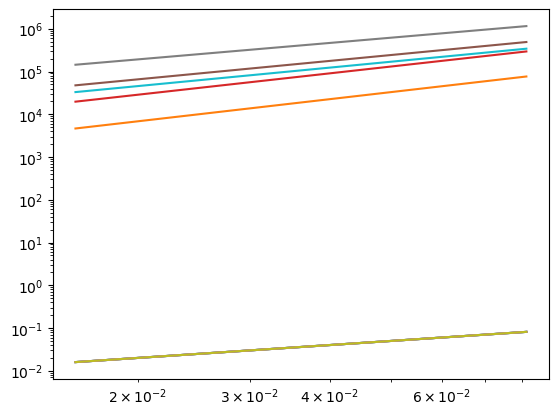

In [7]:
print(data_x_loglog)
for x, y, fx, fy in zip(data_x_loglog, data_y_loglog, fit_x_loglog, fit_y_loglog):
    plt.loglog(x, y)
    plt.loglog(fx, fy)
plt.show()

{'G': (500, 535), 'Y': (535, 570)}


,G,Y
current,,
0.007359,52.257143,8861.914286
0.009701,93.514286,15847.457143
0.015053,202.685714,36788.657143
0.018399,280.028571,52556.2
0.035225,845.542857,147973.257143
0.040725,1241.085714,203470.514286
0.046833,1566.228571,251347.485714
0.053624,2202.285714,343755.428571
0.061150,2974.0,406578.857143


i=array([  52,   93,  202,  280,  845, 1241, 1566, 2202, 2974, 3680, 4960,
       8034, 9838])
corr=array([0.00735946, 0.0097011 , 0.01505343, 0.01839863, 0.035225  ,
       0.04072451, 0.04683285, 0.05362362, 0.06115032, 0.06954678,
       0.07891335, 0.10085788, 0.11373691])
col='G', m=1.9098, c=13.2977
col='G', m=2.0904, c=13.7870
i=array([   8861,   15847,   36788,   52556,  147973,  203470,  251347,
        343755,  406578,  530463,  686849,  984287, 1140647])
corr=array([0.00735946, 0.0097011 , 0.01505343, 0.01839863, 0.035225  ,
       0.04072451, 0.04683285, 0.05362362, 0.06115032, 0.06954678,
       0.07891335, 0.10085788, 0.11373691])
col='Y', m=1.7709, c=17.8790
col='Y', m=1.7555, c=17.8316


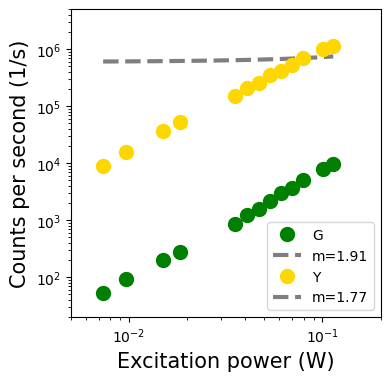

In [8]:

def plot_i_vs_ex(spectrums_dir="spectrums_processed", ranges=ranges):
    intensities = pd.DataFrame(dict.fromkeys(ranges.keys()), index=pd.Index([], dtype=float, name='current'))
    load_spectrums(partial(load_feed, intensities=intensities, ranges=ranges), spectrums_dir)
    intensities.sort_index(ascending=True, inplace=True)
    intensities.index = intensities.index * 0.83333333 - 0.0333333
    intensities.index = intensities.index * filter_scaling
    intensities.index = intensities.index/beam_area
    intensities.drop(index=[intensities.index[-3]], inplace=True)
    display(intensities)
    intensities = intensities.astype({"G":np.int64, "Y":np.int64})
    #fig, axs = plt.subplots(len(intensities.columns), 1, figsize=(12, 8), sharex=True)
    fig, axs = plt.subplots(1, 1, figsize=(4, 4), sharex=True)
    fig.subplots_adjust(hspace=0)
    for i, col in enumerate(intensities.columns): 
        try:
            ax = axs[i]
        except Exception:
            ax = axs

        #full_label = f"{col}, {ranges[col]} nm - pow = {mhp:.2f}"
        #label  = f"pow = {mhp:.2f}"
        corr = intensities.index.values
        i = intensities[col].values#.astype(np.int64)
        print(f"{i=}")
        print(f"{corr=}")
        #corr = corr.astype(np.int64)

        #plt.loglog(i.values, corr.values, 'o', color=colors[col], markersize=10, label=f"{col}, {ranges[col]}nm")


        #ax.plot(np.log(i))
        #ax.plot(np.log(corr.astype(np.int64)), np.log(i))
        logi = np.log(i)
        logc = np.log(corr)
        A = np.vstack([logc, np.ones_like(logc)]).T
        m, c = np.linalg.lstsq(A, logi)[0]
        print(f"{col=}, m={m:.4f}, c={c:.4f}")
        ax.loglog(corr, i, 'o', markersize=10, label=col, color=colors[col], linewidth=3)
        x = np.linspace(min(corr), max(corr), 100)
        #y = np.exp(c) * x**m
        y = np.exp(m*x + c)#np.exp(c) * x**m
        ax.loglog(x, y, linestyle="dashed", color="black", alpha=0.5, label=f"{m=:.2f}", linewidth=3)


        ihp = i[4:]
        corrhp = corr[4:]

        logihp = np.log(ihp)
        logchp = np.log(corrhp)

        Ahp = np.vstack([logchp, np.ones_like(logchp)]).T
        mhp, chp = np.linalg.lstsq(Ahp, logihp)[0]
        print(f"{col=}, m={mhp:.4f}, c={chp:.4f}")
        #ax.plot(logclp, logilp, '-', color=colors[col], markersize=10)
        #ax.loglog(ihp, corrhp, '-', color=colors[col], markersize=10)


        ilp = i[:4]
        corrlp = corr[:4]

        logilp = np.log(ilp)
        logclp = np.log(corrlp)

        Alp = np.vstack([logclp, np.ones_like(logclp)]).T
        mlp, clp = np.linalg.lstsq(Alp, logilp)[0]
        #ax.plot(logclp, logilp, '-', color=colors[col], markersize=10)
        #ax.loglog(ilp, corrlp, '-', color=colors[col], markersize=10)

        #x = np.linspace(min(logclp), max(logchp), 100)
        #x = np.linspace(1.3e-1, 4e-1, 100)
        y_hp = np.exp(chp) * x**mhp  # Reversing the log to linear
        y_lp = np.exp(clp) * x**mlp

        #ax.loglog(x, y_hp, linestyle="dashed", color="#FF0100", alpha=0.5, linewidth=3, label=f"Pendiente = {mhp:.2f}")
        #ax.loglog(x, y_lp, linestyle="dashed", color="#FFFD00", alpha=0.5, linewidth=3, label=f"Pendiente = {mlp:.2f}")
        ax.set_ylim([2e1, 5e6])
        ax.set_xlim([5e-3, 2e-1])

    ax.set_xlabel("Excitation power (W)", fontsize=15)
    ax.set_ylabel("Counts per second (1/s)", fontsize=15)
    plt.legend(fontsize=10, loc='lower right')
    plt.show() 


ranges2 = dict((k, ranges[k]) for k in ('G', 'Y'))
print(ranges2)
plot_i_vs_ex(spectrums_dir="spectrums_yellow", ranges=ranges2)

In [9]:
pd.DataFrame(dict(G=[1], R=[1], Y=[1], UVA=[1], B=[1]), index=pd.Index([0.39],dtype=float, name='current'))

,G,R,Y,UVA,B
current,,,,,
0.39,1,1,1,1,1


491


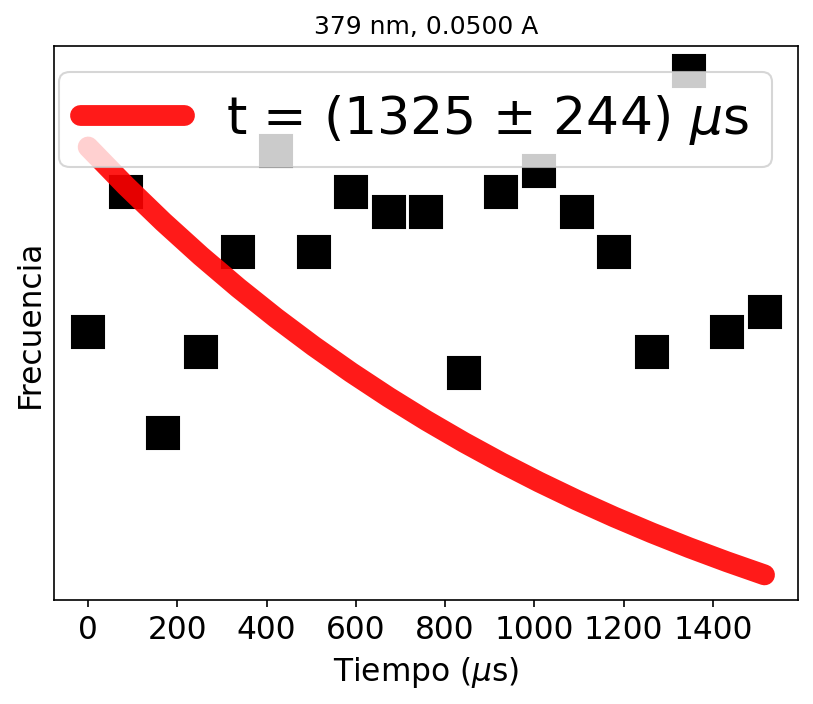

2955


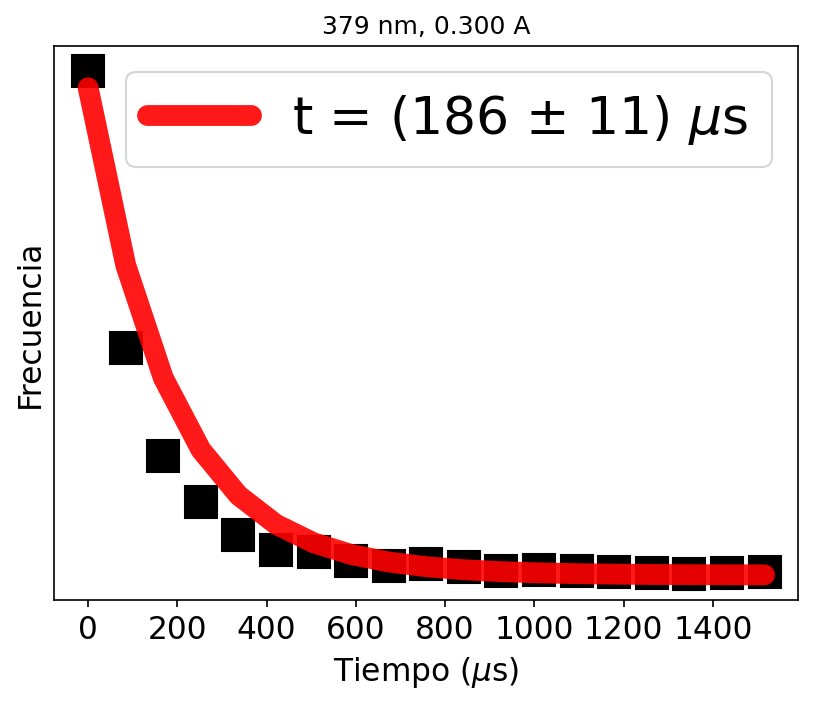

566


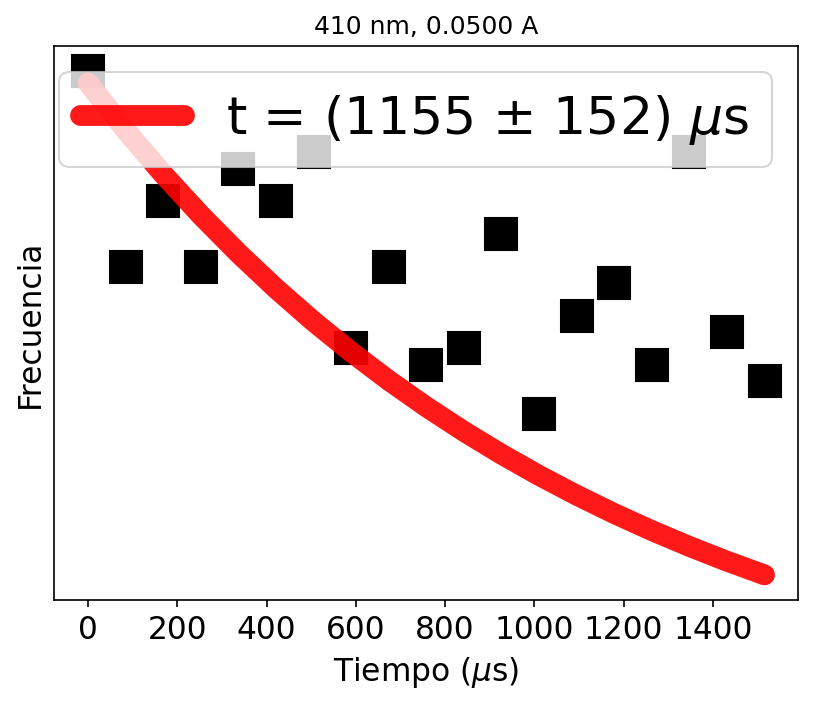

24388


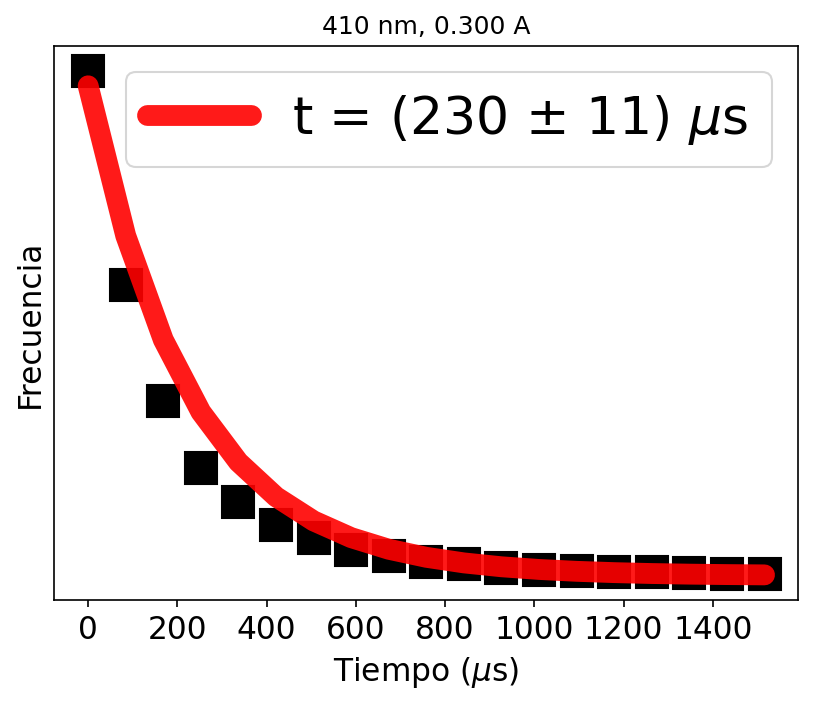

1063


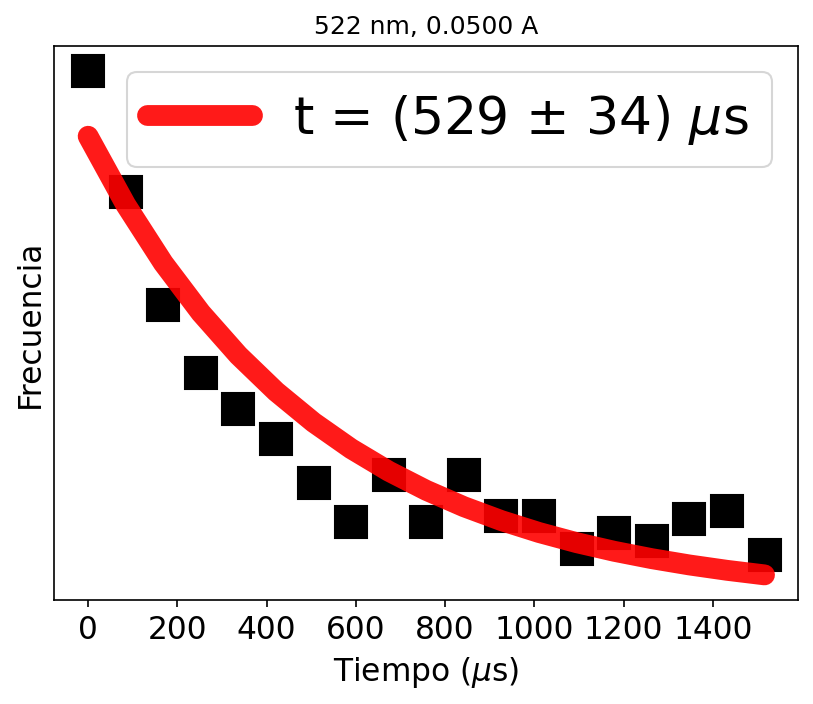

45630


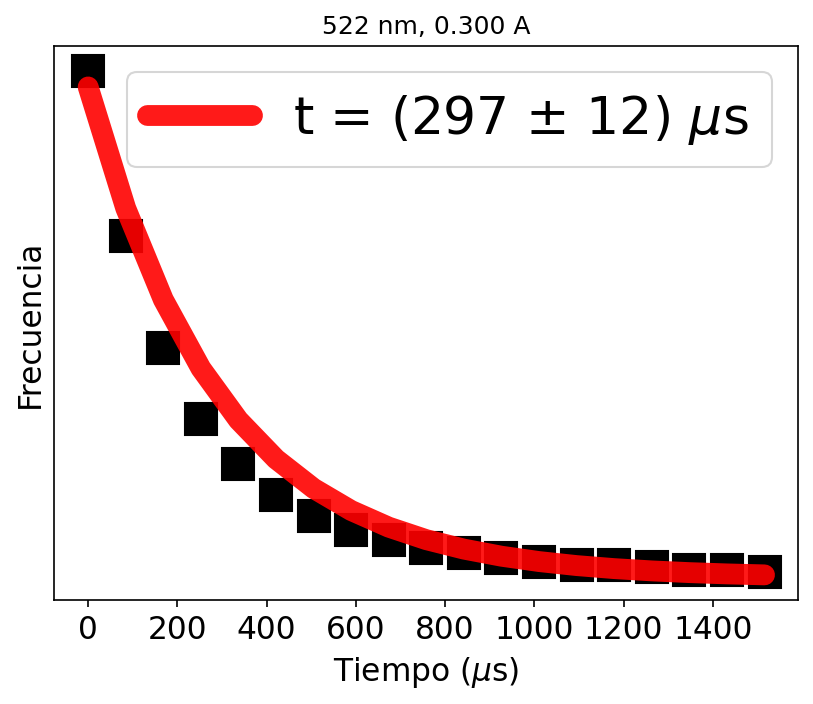

1051


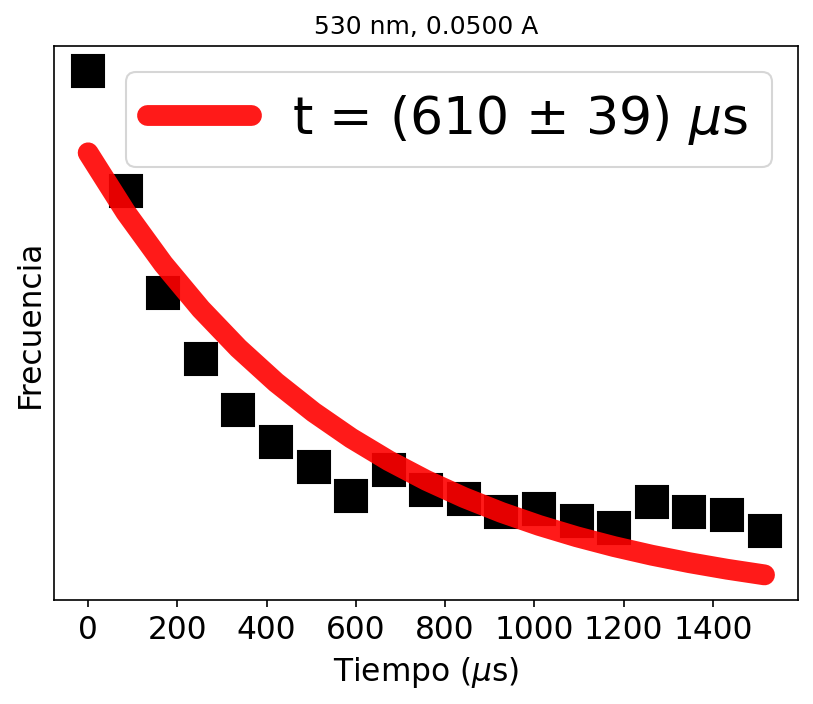

39507


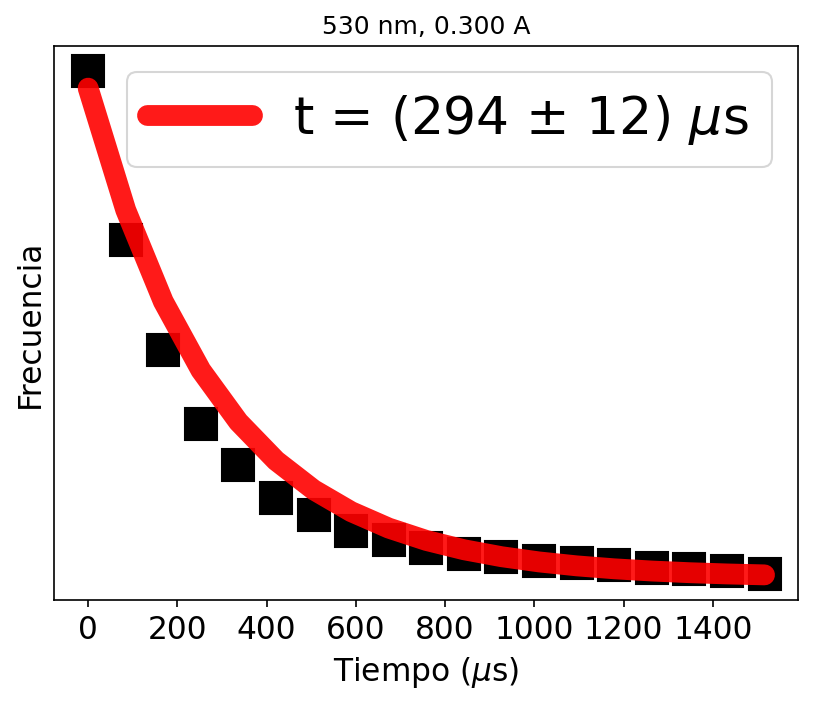

2698


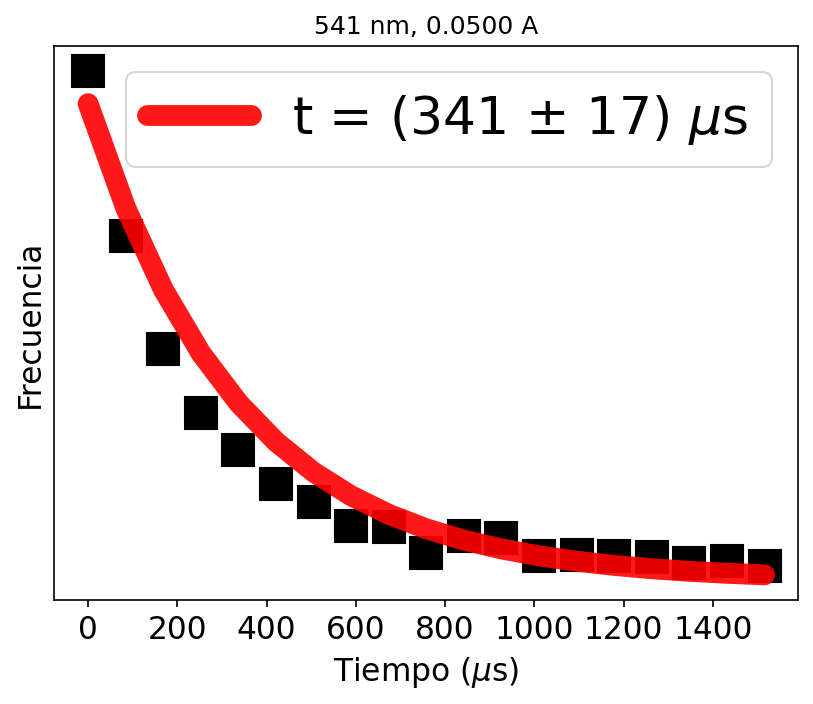

142231


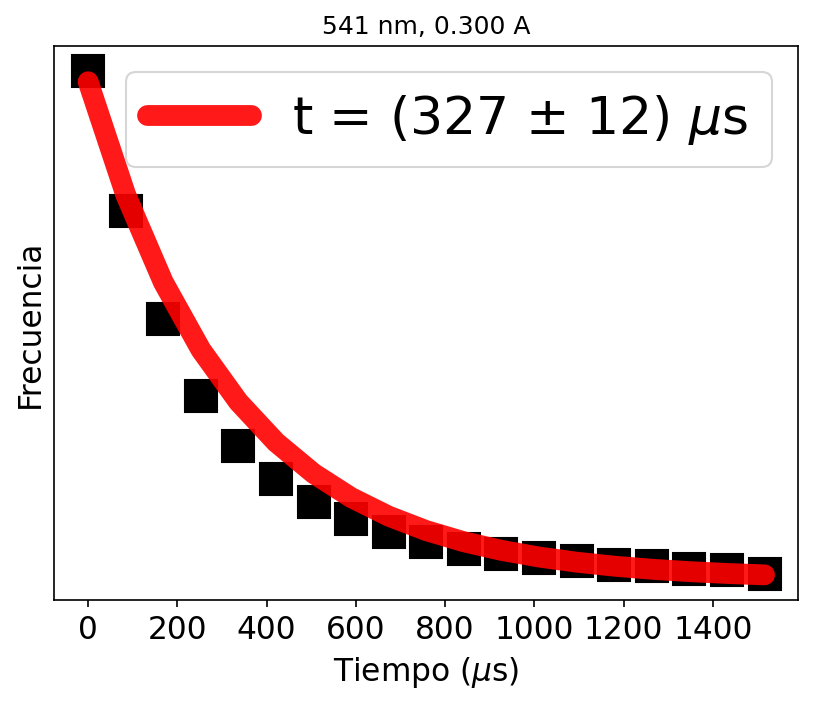

79571


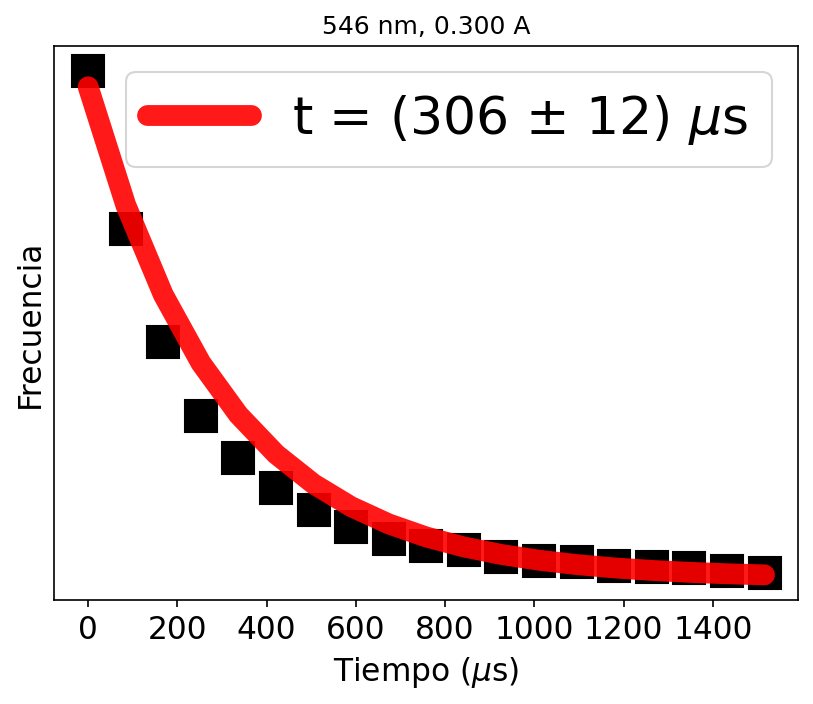

78158


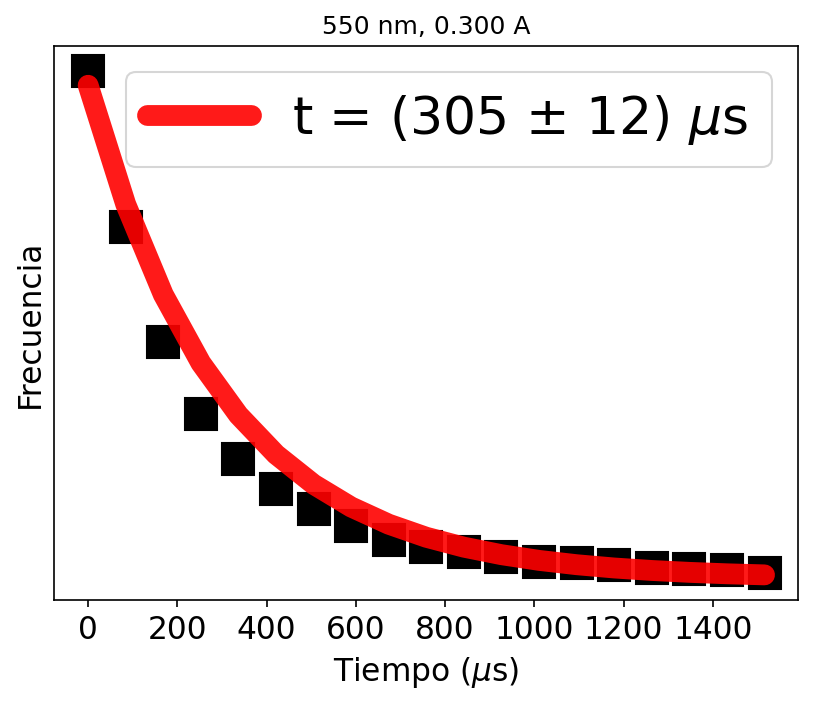

91247


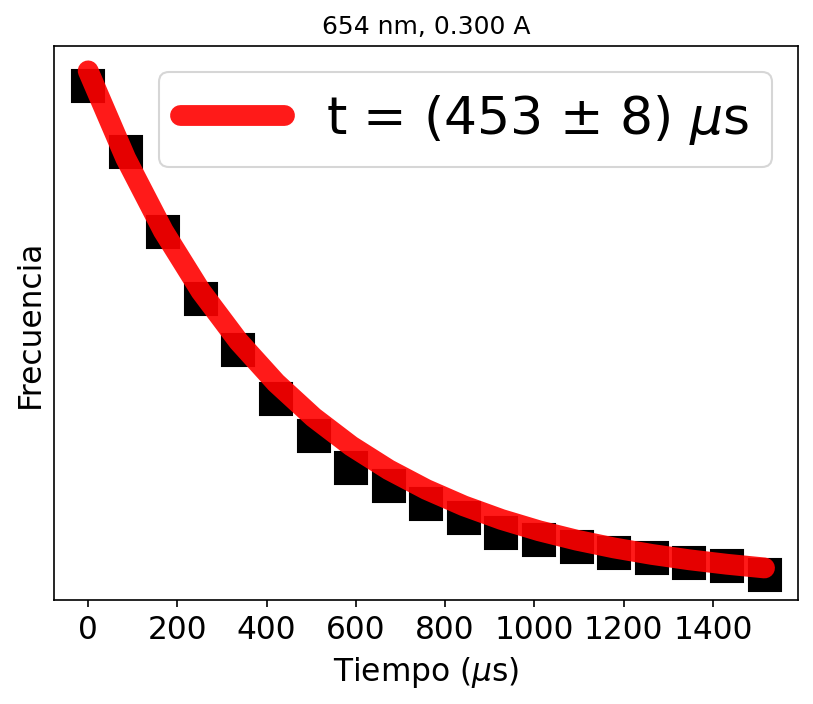

66269


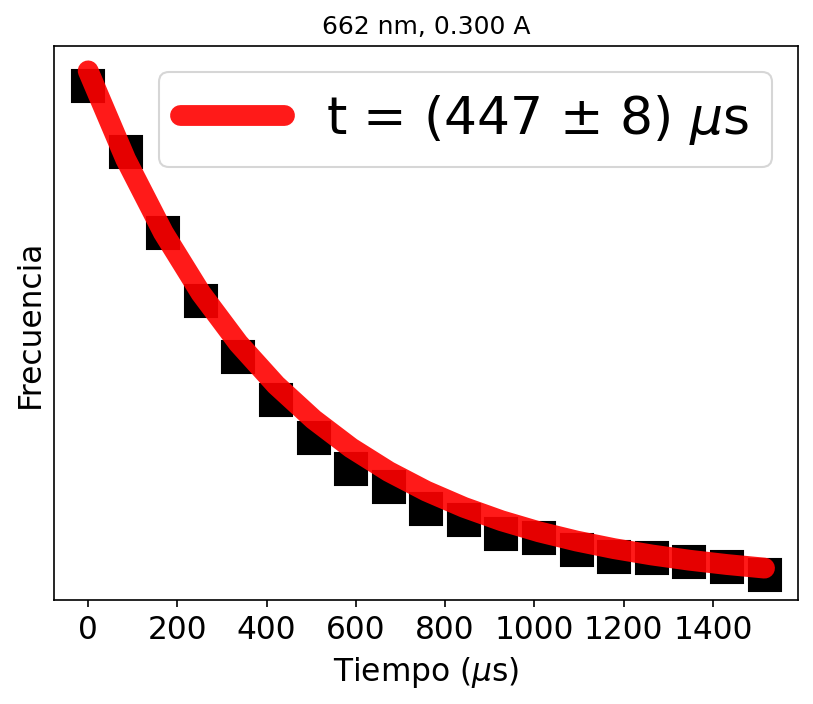

In [65]:
%matplotlib inline
from scipy.optimize import curve_fit

def expon(x, tau):
    return np.exp(-x/tau)/tau

def expon1(x, tau, offset):
    return np.exp(-x/tau)/tau + offset

def expon2(x, tau, A, offset):
    return A * np.exp(-x/tau)/tau + offset

def biexpon(x, tau1, tau2, A1, A2, offset):
    return A1 * np.exp(-x/tau1) + A2 * np.exp(-x/tau2) + offset

def calc_hist(df, bins = np.linspace(0, 1.6e3, 20)):
    freq, bin_edges = np.histogram(df.arrival_times, bins=bins, density=True)
    #print(df.arrival_times)
    bin_width = bin_edges[1]-bin_edges[0]
    bin_centres = bin_edges[1:] - bin_width
    return freq, bin_centres

def calc_hist2(df, bins = np.linspace(0, 1.6e3, 20)):
    freq_N, bin_edges = np.histogram(df.arrival_times, bins=bins, density=False)
    freq, bin_edges = np.histogram(df.arrival_times, bins=bins, density=True)
    #print(df.arrival_times)
    bin_width = bin_edges[1]-bin_edges[0]
    bin_centres = bin_edges[1:] - bin_width
    return freq, bin_centres, freq_N

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
for d in sorted(p.glob('*.pickle')):
    df = pd.read_pickle(d)
    print(len(df.arrival_times))
    bins = np.linspace(0, 1.5e-3, 80)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df)
    popt, pcov = curve_fit(expon, centres, freq, p0=[100])#0.0001])
    tau = popt[0]
    err = np.sqrt(np.diag(pcov)[0])
    #df.hist(bins=bins, density=True)
    plt.figure(dpi=150)
    plt.plot(centres, freq, 's', markersize=15, color="black")
    plt.plot(centres, expon(centres, tau), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=10, alpha=0.9, solid_capstyle="round", color="#FF0100")
    plt.legend(fontsize=25)
    plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
    plt.yticks([])
    plt.xticks(fontsize=15)
    plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
    plt.ylabel("Frecuencia", fontsize=15)
    plt.show()

0          2.656
1         32.192
2         39.360
3         59.360
4         73.856
          ...   
2950    1230.720
2951    1374.912
2952    1125.312
2953    1090.464
2954    1119.712
Name: arrival_times, Length: 2955, dtype: float64
tau=np.float64(136.60845466680283), A=np.float64(99.55188882413242) offset=np.float64(0.011502201811311156)
normalization=np.float64(214574.26135192587)
0           0.352
1           1.056
2           5.824
3           7.392
4           8.128
           ...   
24383    1060.672
24384    1078.336
24385    1326.944
24386    1338.176
24387    1338.208
Name: arrival_times, Length: 24388, dtype: float64
tau=np.float64(169.70615992177866), A=np.float64(151.28554804680334) offset=np.float64(0.01724716557231228)
normalization=np.float64(323757.63436973805)
0           0.832
1           1.152
2           1.440
3           4.768
4           5.376
           ...   
45625    1168.800
45626    1313.408
45627    1338.144
45628    1343.968
45629    1484.928
Name: arri

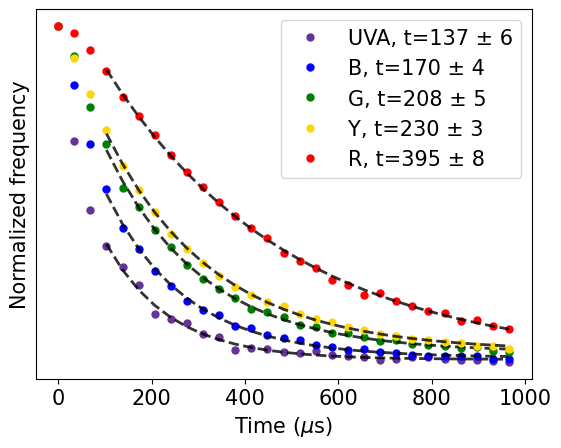

In [11]:

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
paths = []
wls = {379,410,522,541,654}

for d in sorted(p.glob('*_0.3000_*.pickle')):
    if int(d.name.split("_")[0]) in wls:
        paths.append(d)

def fit_expon(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(expon, centres_fit, freq_fit, p0=[100])#0.0001])
    tau = popt[0]
    print(f"{tau=}")
    err = np.sqrt(np.diag(pcov)[0])
    plt.plot(centres_fit, expon(centres_fit, tau), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(expon, tau)
    return tau, err

def fit_expon1(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(expon1, centres_fit, freq_fit, p0=[100, 0])#0.0001])
    tau, offset = popt
    print(f"{tau=}, {offset=}")
    err = np.sqrt(np.diag(pcov)[0])
    plt.plot(centres_fit, expon1(centres_fit, tau, offset), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(expon1, tau, offset)
    return tau, err

def fit_expon2(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(expon2, centres_fit, freq_fit, p0=[100, 10, 0])#0.0001])
    tau, A, offset = popt
    print(f"{tau=}, {A=} {offset=}")
    err = np.sqrt(np.diag(pcov)[0])
    args = [tau, A, offset]
    print_normalization(expon2, tau, A, offset)
    return tau, err, args

def fit_biexpon(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(biexpon, centres_fit, freq_fit, p0=[100, 100, 1/100, 0, 0])#0.0001])
    tau1, tau2, A1, A2, offset = popt
    print(f"{tau1=}, {tau2=}, {A1=}, {A2=}, {offset=}")
    err1 = np.sqrt(np.diag(pcov)[0])
    err2 = np.sqrt(np.diag(pcov)[1])
    plt.plot(centres_fit, biexpon(centres_fit, tau1, tau2, A1, A2, offset), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(biexpon, tau1, tau2, A1, A2, offset)
    return np.mean([tau1, tau2]), np.mean([err1, err2])

def print_normalization(func, *args):
    t = np.linspace(0, 10000, int(1e7))
    normalization = np.sum(func(t, *args))
    print(f"{normalization=}")

for d in paths:
    df = pd.read_pickle(d)
    bins = np.linspace(0, 1e3, 30)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    freq = freq/freq[0]
    
    freq_fit = freq[centres > 100]
    centres_fit = centres[centres > 100] 

    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]

    line, = plt.plot(centres, freq/freq[0], 'o', markersize=5, color=color, linewidth=2)
    tau, err, args = fit_expon2(centres_fit, freq_fit)
    plt.plot(centres_fit, expon2(centres_fit, *args), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    label = f"{wl_color[wl]}, t={tau:.0f} ± {err:.0f}"
    #plt.plot(centres_fit, expon2(centres_fit, tau, A), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=1, alpha=0.9, solid_capstyle="round", color="#FF0100")
    line.set_label(label)
    plt.legend(fontsize=15)
    #plt.show()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
plt.yticks([])
plt.xticks(fontsize=15)
plt.xlabel("Time ($\mu$s)", fontsize=15)
plt.ylabel("Normalized frequency", fontsize=15)
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.png")
plt.show()

0          2.656
1         32.192
2         39.360
3         59.360
4         73.856
          ...   
2950    1230.720
2951    1374.912
2952    1125.312
2953    1090.464
2954    1119.712
Name: arrival_times, Length: 2955, dtype: float64
tau=np.float64(136.60845466680283), A=np.float64(99.55188882413242) offset=np.float64(0.011502201811311156)
normalization=np.float64(214574.26135192587)
0           0.352
1           1.056
2           5.824
3           7.392
4           8.128
           ...   
24383    1060.672
24384    1078.336
24385    1326.944
24386    1338.176
24387    1338.208
Name: arrival_times, Length: 24388, dtype: float64
tau=np.float64(169.70615992177866), A=np.float64(151.28554804680334) offset=np.float64(0.01724716557231228)
normalization=np.float64(323757.63436973805)
0           0.832
1           1.152
2           1.440
3           4.768
4           5.376
           ...   
45625    1168.800
45626    1313.408
45627    1338.144
45628    1343.968
45629    1484.928
Name: arri

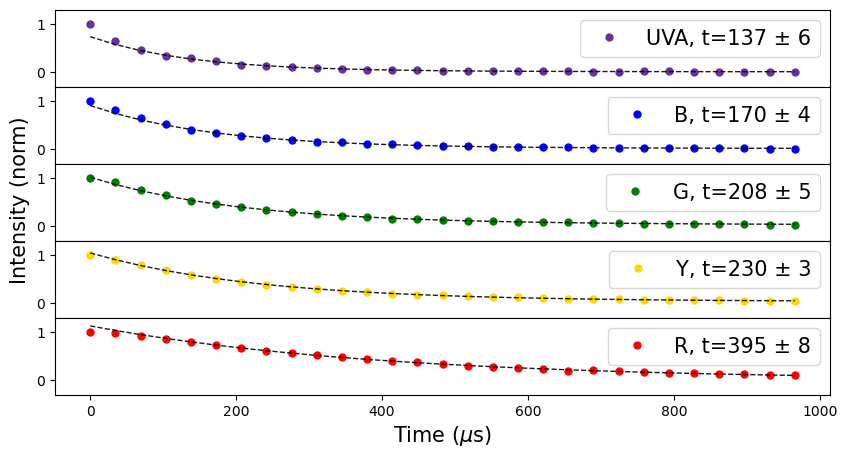

In [12]:

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
paths = []
wls = {379,410,522,541,654}

for d in sorted(p.glob('*_0.3000_*.pickle')):
    if int(d.name.split("_")[0]) in wls:
        paths.append(d)

fig, axs = plt.subplots(len(paths), 1, sharex=True, figsize=(10, 5))
fig.subplots_adjust(hspace=0)

for d, ax in zip(paths, axs):
    df = pd.read_pickle(d)
    bins = np.linspace(0, 1e3, 30)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    freq = freq/freq[0]
    
    freq_fit = freq[centres > 100]
    centres_fit = centres[centres > 100] 

    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]

    line, = ax.plot(centres, freq/freq[0], 'o', markersize=5, color=color, linewidth=2)
    tau, err, args = fit_expon2(centres_fit, freq_fit)
    label = f"{wl_color[wl]}, t={tau:.0f} ± {err:.0f}"
    ax.plot(centres, expon2(centres, *args), linewidth=1, alpha=0.9, linestyle="dashed", color="Black")
    line.set_label(label)
    ax.legend(fontsize=15)
    #plt.show()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
    ax.set_yticks([0, 1])
    ax.set_ylim([-0.3, 1.3])
    #ax.grid()
#ax.set_xticks(fontsize=15)
ax.set_xlabel("Time ($\mu$s)", fontsize=15)
#ax.ylabel("Normalized frequency", fontsize=15)
fig.text(0.08, 0.5, 'Intensity (norm)', va='center', rotation='vertical', fontsize=15)
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_multiple.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_multiple.png")
plt.show()

0            1.120
1            2.208
2            2.720
3            4.608
4            4.800
            ...   
142226    1240.288
142227    1270.112
142228    1342.688
142229    1350.400
142230    1350.752
Name: arrival_times, Length: 142231, dtype: float64
tau=np.float64(230.7805307059137), A=np.float64(229.70032667306424) offset=np.float64(0.03663311512977181)
normalization=np.float64(596031.9526607861)
0        125.344
1        115.456
2        221.536
3          2.976
4         91.072
          ...   
2693    1156.544
2694    1062.208
2695    1554.848
2696    1168.800
2697    1442.240
Name: arrival_times, Length: 2698, dtype: float64
tau=np.float64(225.45004436721916), A=np.float64(191.41619314010694) offset=np.float64(0.052232886708502034)
normalization=np.float64(713745.4656040064)


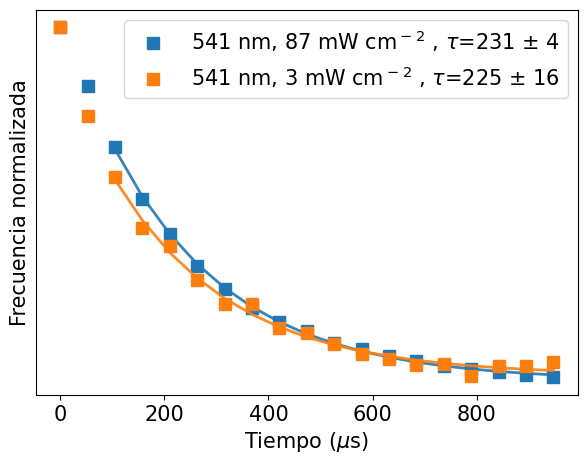

In [13]:
wl = 541
p1 = Path(f"/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/{wl}_0.3000_300.pickle")
p2 = Path(f"/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/{wl}_0.0500_1800.pickle")
dfs = [pd.read_pickle(p1), pd.read_pickle(p2)]
colors_power = ["C0", "C1"]
markers_power = ["s", "s"]
powers = [8, 210]

corr1 = 0.3
corr1 = corr1 * 0.83333333 - 0.033333
corr1 = corr1 * filter_scaling
corr1 = corr1/beam_area

corr2 = 0.05
corr2 = corr2 * 0.83333333 - 0.033333
corr2 = corr2 * filter_scaling
corr2 = corr2/beam_area

powers = [int(np.round(corr1*1000)), int(np.round(corr2*1000))]

plt.figure(figsize=(7,5))

freqs = []
for i, df in enumerate(dfs):
    bins = np.linspace(0, 1e3, 20)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    freq = freq/freq[0]
    freqs.append(freq)
    
    freq_fit = freq[centres > 100]
    centres_fit = centres[centres > 100] 

    #color = colors["Y"]
    #color = colors[wl_color[wl]]
    color = colors_power[i]
    marker = markers_power[i]

    line, = plt.plot(centres, freq/freq[0], marker=marker, markersize=8, color=color, linewidth=2, ls='none')
    tau, err, args = fit_expon2(centres_fit, freq_fit)
    plt.plot(centres_fit, expon2(centres_fit, *args), linewidth=2, alpha=0.9, linestyle="solid", color=color)
    label = f"{str(int(wl))} nm, {powers[i]} mW cm$^-$$^2$ , $\\tau$={tau:.0f} ± {err:.0f}"
    #plt.plot(centres_fit, expon2(centres_fit, tau, A), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=1, alpha=0.9, solid_capstyle="round", color="#FF0100")
    line.set_label(label)
    plt.legend(fontsize=15)
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
plt.yticks([])
plt.xticks(fontsize=15)
plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
plt.ylabel("Frecuencia normalizada", fontsize=15)
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_power.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_power.png")
#plt.title(f"{wl} nm")
plt.show()


# Tiempos de vida paper

/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/379_0.3000_300.pickle
tau=np.float64(125.08476136196701), A=np.float64(105.2524777670729) offset=np.float64(0.01525759934400075)
normalization=np.float64(257828.88140701203)
/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/410_0.3000_300.pickle
tau=np.float64(169.74373298251663), A=np.float64(149.68170571349077) offset=np.float64(0.01804442271020469)
normalization=np.float64(330126.3587527529)
/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/522_0.3000_300.pickle
tau=np.float64(207.53192086523026), A=np.float64(200.4790681210824) offset=np.float64(0.033082135160605784)
normalization=np.float64(531300.8826874072)
/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/541_0.3000_300.pickle
tau=np.float64(230.7805307059137), A=np.float64(229.70032667

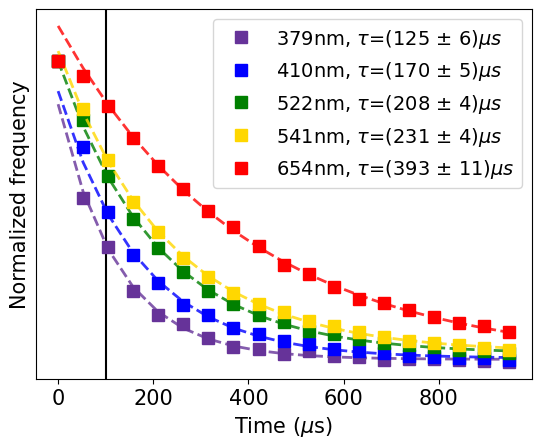

In [91]:

p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes')
paths = []
wls = {379,410,522,541,654}

for d in sorted(p.glob('*_0.3000_*.pickle')):
    if int(d.name.split("_")[0]) in wls:
        paths.append(d)

def fit_expon(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(expon, centres_fit, freq_fit, p0=[100])#0.0001])
    tau = popt[0]
    print(f"{tau=}")
    err = np.sqrt(np.diag(pcov)[0])
    plt.plot(centres_fit, expon(centres_fit, tau), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(expon, tau)
    return tau, err

def fit_expon1(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(expon1, centres_fit, freq_fit, p0=[100, 0])#0.0001])
    tau, offset = popt
    print(f"{tau=}, {offset=}")
    err = np.sqrt(np.diag(pcov)[0])
    plt.plot(centres_fit, expon1(centres_fit, tau, offset), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(expon1, tau, offset)
    return tau, err

def fit_expon2(centres, freq, **kwargs) -> tuple[float, float]:
    try:
        popt, pcov = curve_fit(expon2, centres_fit, freq_fit, p0=[100, 10, 0], sigma=kwargs["sigma"], absolute_sigma=True)#0.0001])
    except:
        popt, pcov = curve_fit(expon2, centres_fit, freq_fit, p0=[100, 10, 0])#0.0001])
    tau, A, offset = popt
    print(f"{tau=}, {A=} {offset=}")
    err = np.sqrt(np.diag(pcov)[0])
    args = [tau, A, offset]
    print_normalization(expon2, tau, A, offset)
    return tau, err, args

def fit_biexpon(centres, freq, **kwargs) -> tuple[float, float]:
    popt, pcov = curve_fit(biexpon, centres_fit, freq_fit, p0=[100, 100, 1/100, 0, 0])#0.0001])
    tau1, tau2, A1, A2, offset = popt
    print(f"{tau1=}, {tau2=}, {A1=}, {A2=}, {offset=}")
    err1 = np.sqrt(np.diag(pcov)[0])
    err2 = np.sqrt(np.diag(pcov)[1])
    plt.plot(centres_fit, biexpon(centres_fit, tau1, tau2, A1, A2, offset), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color="black")
    print_normalization(biexpon, tau1, tau2, A1, A2, offset)
    return np.mean([tau1, tau2]), np.mean([err1, err2])

def print_normalization(func, *args):
    t = np.linspace(0, 10000, int(1e7))
    normalization = np.sum(func(t, *args))
    print(f"{normalization=}")

plt.axvline(100, ymin=-10, ymax=10, color="black", linestyle="solid")

for d in paths:
    df = pd.read_pickle(d)
    print(d)
    wl_meas = d.name[:3]
    bins = np.linspace(0, 1e3, 20)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    freq = freq/freq[0]
    
    freq_fit = freq[centres > 100]
    centres_fit = centres[centres > 100] 

    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]

    line, = plt.plot(centres, freq/freq[0], 's', markersize=8, color=color, linewidth=2)
    tau, err, args = fit_expon2(centres_fit, freq_fit)
    #plt.plot(centres_fit, expon2(centres_fit, *args), linewidth=2, linestyle="solid", alpha=0.8, solid_capstyle="round", color=color)
    plt.plot(centres, expon2(centres, *args), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color=color)
    #label = f"{wl_color[wl]}, t={tau:.0f} ± {err:.0f}"
    label = f"{wl_meas}nm, $\\tau$=({tau:.0f} ± {err:.0f})$\mu s$"
    #plt.plot(centres_fit, expon2(centres_fit, tau, A), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=1, alpha=0.9, solid_capstyle="round", color="#FF0100")
    line.set_label(label)
    plt.legend(fontsize=14)
    #plt.show()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")


    ###### RESIDUOS

plt.yticks([])
plt.xticks(fontsize=15)
plt.xlabel("Time ($\mu$s)", fontsize=15)
plt.ylabel("Normalized frequency", fontsize=15)
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.png")
plt.show()

# MISMO GRAFICO CON RESIDUOS

tau=np.float64(125.08476136196701), A=np.float64(105.2524777670729) offset=np.float64(0.01525759934400075)
normalization=np.float64(257828.88140701203)
rebeccapurple
tau=np.float64(169.74373298251663), A=np.float64(149.68170571349077) offset=np.float64(0.01804442271020469)
normalization=np.float64(330126.3587527529)
blue
tau=np.float64(207.53192086523026), A=np.float64(200.4790681210824) offset=np.float64(0.033082135160605784)
normalization=np.float64(531300.8826874072)
green
tau=np.float64(230.7805307059137), A=np.float64(229.70032667306424) offset=np.float64(0.03663311512977181)
normalization=np.float64(596031.9526607861)
gold
tau=np.float64(393.0325395644713), A=np.float64(436.29757279219746) offset=np.float64(0.004754356144540305)
normalization=np.float64(483841.6456442035)
red


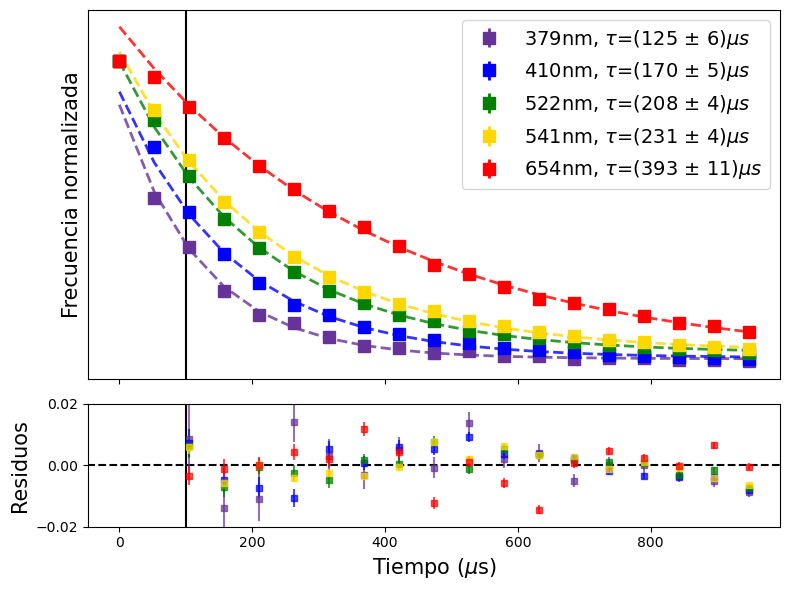

In [118]:

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6))
axp, axr = axs
axp.axvline(100, ymin=-10, ymax=10, color="black", linestyle="solid")
axr.axvline(100, ymin=-10, ymax=10, color="black", linestyle="solid")
axr.axhline(0, xmin=-1, xmax=3000, color="black", linestyle="dashed")

labels=[]
for d in paths:
    df = pd.read_pickle(d)
    #print(d)
    wl_meas = d.name[:3]
    bins = np.linspace(0, 1e3, 20)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres, freq_N = calc_hist2(df, bins=bins)
    freq = freq/freq[0]
    
    freq_fit = freq[centres > 100]
    freq_N_fit = freq_N[centres > 100]
    N = np.sum(freq_N)
    centres_fit = centres[centres > 100] 

    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]

    N_freq = N
    tau, err, args = fit_expon2(centres_fit, freq_fit, sigma=np.sqrt(freq)/np.sqrt(N_freq))
    label = f"{wl_meas}nm, $\\tau$=({tau:.0f} ± {err:.0f})$\mu s$"
    labels.append(label)

    #line, = axp.plot(centres, freq/freq[0], 's', markersize=8, color=color, linewidth=2)
    axp.errorbar(centres, freq, yerr=np.sqrt(freq)/np.sqrt(N_freq), marker="s", markersize=8, color=color, linewidth=2, ls="none", label=label)
    #plt.plot(centres_fit, expon2(centres_fit, *args), linewidth=2, linestyle="solid", alpha=0.8, solid_capstyle="round", color=color)
    axp.plot(centres, expon2(centres, *args), linewidth=2, linestyle="dashed", alpha=0.8, solid_capstyle="round", color=color)
    #label = f"{wl_color[wl]}, t={tau:.0f} ± {err:.0f}"
    #plt.plot(centres_fit, expon2(centres_fit, tau, A), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=1, alpha=0.9, solid_capstyle="round", color="#FF0100")
    #line.set_label(label)
    #plt.show()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")


    ###### RESIDUOS
    print(color)

    #if color == "rebeccapurple":
    #axr.plot(centres, freq/freq[0] - expon2(centres, *args), marker="s", markersize=8, color=color, ls="none", alpha=0.99)
    axr.errorbar(centres_fit, freq_fit - expon2(centres_fit, *args), yerr=np.sqrt(freq_fit)/np.sqrt(N_freq),marker="s", markersize=4, color=color, ls="none", alpha=0.7)


    
#axr.set_yscale('log')
ylim = 0.02
axr.set_ylim([-ylim, ylim])
axr.set_yticks([-ylim, 0.0, ylim])
axp.legend(fontsize=14)
axp.set_yticks([])
#axr.set_yticks([])
#axr.set_xticksparams(fontsize=15)
axr.set_xlabel("Tiempo ($\mu$s)", fontsize=15)
axp.set_ylabel("Frecuencia normalizada", fontsize=15)
axr.set_ylabel("Residuos", fontsize=15)
plt.tight_layout()
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_residuos.svg")
plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes_residuos.png")
plt.show()

# Mismo gráfico con logy scale

/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/379_0.3000_300.pickle
0          2.656
1         32.192
2         39.360
3         59.360
4         73.856
          ...   
2950    1230.720
2951    1374.912
2952    1125.312
2953    1090.464
2954    1119.712
Name: arrival_times, Length: 2955, dtype: float64
[6.63886975e-03 3.63370090e-03 2.56650586e-03 1.59097174e-03
 1.06719504e-03 8.77325982e-04 5.69607167e-04 3.73190903e-04
 3.27360441e-04 2.22605100e-04 2.74982771e-04 1.70227429e-04
 1.63680221e-04 9.16609235e-05 1.17849759e-04 1.11302550e-04
 8.51137147e-05 7.20192970e-05 4.58304618e-05]
0.019
/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/lifetimes/410_0.3000_300.pickle
0           0.352
1           1.056
2           5.824
3           7.392
4           8.128
           ...   
24383    1060.672
24384    1078.336
24385    1326.944
24386    1338.176
24387    1338.208
Name: arrival_times, Lengt

/tmp/ipykernel_6196/573281386.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(centres, freq/freq[0], yerr=np.abs(np.log(freq))/np.log(freq[0]), marker='s', markersize=8, color=color, linewidth=2, ls="none")
/tmp/ipykernel_6196/573281386.py:25: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(centres, freq/freq[0], yerr=np.abs(np.log(freq))/np.log(freq[0]), marker='s', markersize=8, color=color, linewidth=2, ls="none")
/tmp/ipykernel_6196/573281386.py:25: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(centres, freq/freq[0], yerr=np.abs(np.log(freq))/np.log(freq[0]), marker='s', markersize=8, color=color, linewidth=2, ls="none")
/tmp/ipykernel_6196/573281386.py:25: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(centres, freq/freq[0], yerr=np.abs(np.log(freq))/np.log(freq[0]), marker='s', markersize=8, color=color, linewidth=2, ls="none")
/tmp/ipykernel_6196/573281386.py:25: RuntimeWarning: divide by zer

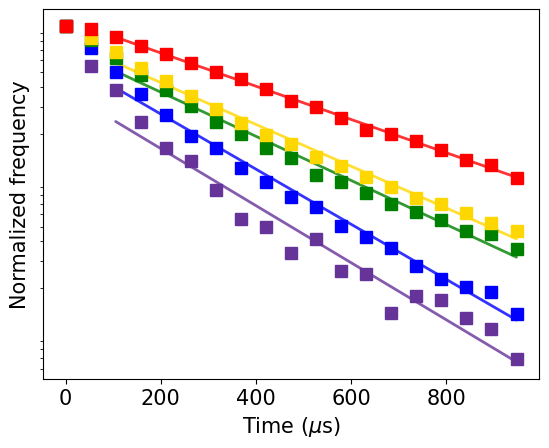

In [52]:
def lineal(x, m, b):
    return m*x + b

def fit_lineal(x_fit, y_fit):
    popt, pcov = curve_fit(lineal, x_fit, y_fit, p0=[-1, 1])
    return popt[0], np.sqrt(np.diag(pcov))[0], popt

for d in paths:
    df = pd.read_pickle(d)
    print(d)
    wl_meas = d.name[:3]
    bins = np.linspace(0, 1e3, 20)
    df.arrival_times = df.arrival_times * 1e6
    freq, centres = calc_hist(df, bins=bins)
    print(freq)
    print(np.sum(freq))
    freq = freq/freq[0]
    
    freq_fit = np.log(freq[centres > 100])
    centres_fit = centres[centres > 100] 

    wl = int(d.name[:d.name.index("_")])
    color = colors[wl_color[wl]]

    plt.errorbar(centres, freq/freq[0], yerr=np.abs(np.log(freq))/np.log(freq[0]), marker='s', markersize=8, color=color, linewidth=2, ls="none")
    #plt
    tau, err, args = fit_lineal(centres_fit, freq_fit)
    #plt.plot(centres_fit, expon2(centres_fit, *args), linewidth=2, linestyle="solid", alpha=0.8, solid_capstyle="round", color=color)
    plt.plot(centres_fit, np.exp(lineal(centres_fit, *args)), linewidth=2, linestyle="solid", alpha=0.8, solid_capstyle="round", color=color)
    #label = f"{wl_color[wl]}, t={tau:.0f} ± {err:.0f}"
    label = f"{wl_meas}nm, $\\tau$=({tau:.0f} ± {err:.0f})$\mu s$"
    #plt.plot(centres_fit, expon2(centres_fit, tau, A), label=f"t = ({tau:.0f} $\pm$ {err:.0f}) $\mu$s ", linewidth=1, alpha=0.9, solid_capstyle="round", color="#FF0100")
    line.set_label(label)
    #plt.legend(fontsize=14)
    #plt.show()
    #plt.title(f"{d.name[:d.name.index('_')]} nm, {d.name[d.name.index('_')+1:d.name[::-1].index('_')-1]} A")
plt.yscale("log")
plt.yticks([])
plt.xticks(fontsize=15)
plt.xlabel("Time ($\mu$s)", fontsize=15)
plt.ylabel("Normalized frequency", fontsize=15)
#plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.svg")
#plt.savefig("/home/tomi/Documents/academicos/facultad/tesis/tesis/data_analysis/peak_counting/images_paper/lifetimes.png")
#plt.yscale("log")
plt.show()

# Espectros pico amarillo

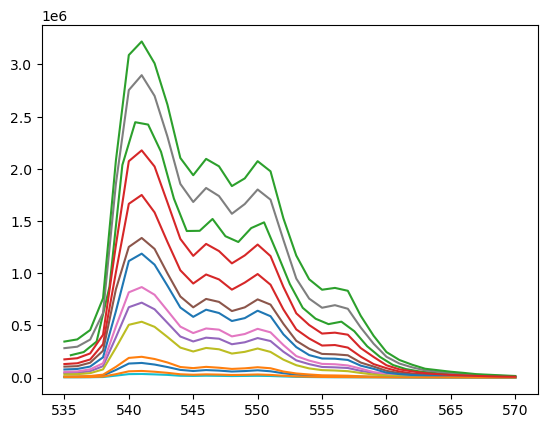

In [312]:
p = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_processed')
p_yellow = Path('/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/spectrums_yellow')
for d in p.iterdir():
    df = pd.read_pickle(d)
    df_yellow = df[df.wavelength.between(535, 570)]
    #plt.plot(df_yellow.wavelength, df_yellow.counts)
    df_yellow.to_pickle(p_yellow/d.name)

for d in p_yellow.iterdir():
    df = pd.read_pickle(d)
    plt.plot(df.wavelength, df.counts)
plt.show()